## Welcome to Day 8 - Homework!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housepricesdata.csv')

In [3]:
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

# CLEANING DATA

Sebelum mengerjakan soal, dilakukan pengecekan terhadap data
1. Tipe datanya
2. Data Null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


Dari info di atas didapatkan bahwa pada kolom Unit_Name terdapat 1 missing value, yakni nama unit apartemennya tidak diketahui

In [5]:
df[df['Unit_Name'].isnull()]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
1491,NaN,2,2,Thamrin,Jakarta Pusat,106.818654,-6.194443,1,74.0,Tower Cosmo Mansion,21,IDR,120000000


Sebenarnya dapat dicari tahu nama unit apa yang memiliki value seperti di atas dari data yang tersedia.
Namun, karena datanya hanya 1. Dihapus juga tidak akan terlalu berpengaruh signifikan.

In [6]:
df = df[~df['Unit_Name'].isnull()].reset_index(drop = True)

Setelah data dihilangkan, dapat dilihat bahwa jumlah baris yang semula berjumlah 5303 menjadi 5302.

In [7]:
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5298,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5299,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5300,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


Tipe data pun sudah sesuai, serta sudah tidak terdapat nilai null pada dataset, dapat dilihat pada tabel di bawah ini:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5302 non-null   int64  
 2   Bathroom          5302 non-null   int64  
 3   Locality          5302 non-null   object 
 4   Region            5302 non-null   object 
 5   Longitude         5302 non-null   float64
 6   Latitude          5302 non-null   float64
 7   Furnished         5302 non-null   int64  
 8   Area              5302 non-null   float64
 9   Tower             5302 non-null   object 
 10  Total_Facilities  5302 non-null   int64  
 11  Currency          5302 non-null   object 
 12  Annual_Price      5302 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.6+ KB


### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Buat visualisasi yang menurut Anda sesuai. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 

3. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada outlier? Jika ya, nyatakanlah apa yang membuat data-data tersebut outlier. Apakah outlier-outlier pada kolom `Longitude` merupakan sesuatu yang bisa dijelaskan (masuk akal), atau tidak? Jelaskan. 

4. Apakah outlier-outlier pada kolom `Latitude` merupakan sesuatu yang bisa dijelaskan (masuk akal)? Jelaskan.

5. Buatlah simple Linear Regression dengan ketentuan berikut:
    - Kolom prediktor: `Area`, `Total_Facilities`, `No_Rooms`
    - Kolom target: `CleanedPrice`
    - Train Test Split dilakukan dengan 80% Train, 20% Test
    - Laporkanlah RMSE dan R2 Score dari model yang kalian buat, jika dievaluasi pada Test Set. 

### Nomor 1:

In [9]:
#Mengecek usd price
df['Currency'].unique()

array(['IDR', 'USD'], dtype=object)

In [10]:
df[df['Currency']=="USD"]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600
770,Residences 8 Senopati 1BR,1,1,Senopati,Jakarta Selatan,106.806005,-6.228974,1,94.0,Tower 3,14,USD,19200
781,District 8 Senopati 2BR FULLY FURNISHED,2,2,Senopati,Jakarta Selatan,106.806680,-6.228444,1,105.0,Tower Infinity,18,USD,28800
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,42000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000


Terdapat 52 unit apartemen yang menggunakan mata uang USD. Currency USD akan diubah menjadi IDR dengan 1 USD = 15000 IDR

In [11]:
CleanedPrice = []

for x,y in zip(df['Currency'],df['Annual_Price']):
    if x == "USD":
        CleanedPrice.append(y*15000)
    else:
        CleanedPrice.append(y)
        
#input in dataframe dengan variabel baru clean_price
df['CleanedPrice']=CleanedPrice

In [12]:
#check
df[df['Currency']=="USD"]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800,432000000
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400,306000000
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600,324000000
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600,414000000
770,Residences 8 Senopati 1BR,1,1,Senopati,Jakarta Selatan,106.806005,-6.228974,1,94.0,Tower 3,14,USD,19200,288000000
781,District 8 Senopati 2BR FULLY FURNISHED,2,2,Senopati,Jakarta Selatan,106.806680,-6.228444,1,105.0,Tower Infinity,18,USD,28800,432000000
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,42000,630000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000,810000000


### Nomor 2:

<AxesSubplot:xlabel='No_Rooms', ylabel='CleanedPrice'>

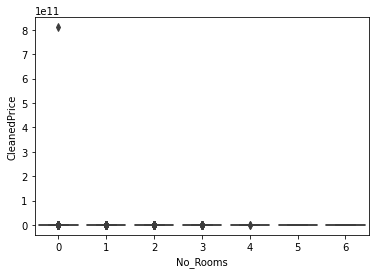

In [13]:
#Analisa No_Rooms vs CleanedPrice
sns.boxplot(data=df, x="No_Rooms", y="CleanedPrice")

Dari boxplot di atas dapat dilihat bahwa terdapat outliers pada ruangan berjumlah 0, yang memiliki harga sangat tinggi.
Mari dicek:

In [14]:
df[df["No_Rooms"]==0].describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.99])

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
count,1113.0,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1.113000e+03
mean,0.0,0.998203,106.856702,-6.153914,0.818509,27.086020,17.732255,4.894575e+07,7.768541e+08
std,0.0,0.084800,0.559338,1.024902,0.385598,7.640417,3.842236,2.861414e+07,2.427792e+10
min,0.0,0.000000,104.014900,-7.949100,0.000000,0.000000,0.000000,1.440000e+04,1.200000e+07
10%,0.0,1.000000,106.663200,-6.307531,0.000000,21.000000,13.000000,2.500000e+07,2.500000e+07
25%,0.0,1.000000,106.742200,-6.255134,1.000000,22.000000,15.000000,3.240000e+07,3.240000e+07
50%,0.0,1.000000,106.811453,-6.200106,1.000000,26.000000,19.000000,4.000000e+07,4.000000e+07
75%,0.0,1.000000,106.850107,-6.180433,1.000000,30.000000,21.000000,5.700000e+07,5.700000e+07
95%,0.0,1.000000,106.999000,-6.149622,1.000000,39.000000,23.000000,1.080000e+08,1.084000e+08
99%,0.0,1.000000,107.778036,-6.109022,1.000000,60.000000,24.000000,1.517600e+08,1.560000e+08


Dari boxplot dan summary statistik, terlihat bahwa outliers bernilai 800 M, nilainya jauh dari nilai apartmen lain
yang hanya ratusan juta saja

In [15]:
df[df["CleanedPrice"]==8.100000e+11]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000


In [ ]:
Karena hanya 1 saja apartemen dengan jumlah ruangan 0 yang memiliki harga tidak masuk akal, agar tidak mengganggu analisis lebih
lanjut, data ini lebih baik dihilangkan.

In [17]:
#Menghilangkan Outliers
df=df[df["CleanedPrice"]<8.100000e+11]
df=df.reset_index(drop=True)
df.shape

(5301, 14)

<AxesSubplot:xlabel='No_Rooms', ylabel='CleanedPrice'>

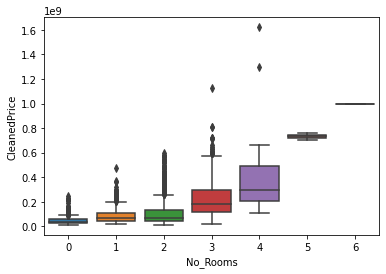

In [18]:
#Check boxplot lagi
sns.boxplot(data=df, x="No_Rooms", y="CleanedPrice")

Setelah nilai outliers yang sangat besar dihilangkan, tampilan boxplotnya jadi lebih terlihat.

Text(0, 0.5, 'Price')

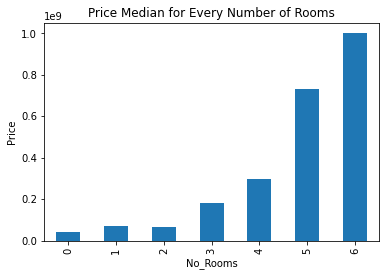

In [19]:
#Analysis no_rooms vs CleanedPrice Median
df.groupby("No_Rooms")["CleanedPrice"].median().plot(kind="bar", title="Price Median for Every Number of Rooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

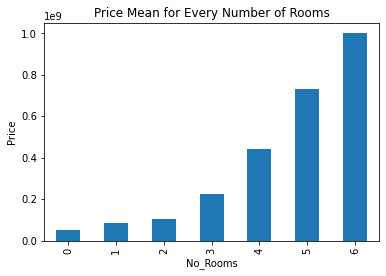

In [20]:
#Analysis no_rooms vs CleanedPrice Mean
df.groupby("No_Rooms")["CleanedPrice"].mean().plot(kind="bar", title="Price Mean for Every Number of Rooms")
plt.ylabel("Price")

Dari hasil plot diagram batang mean dan median no_room vs price di atas. Dapat dilihat bahwa semakin banyak jumlah ruangan,
maka harganya akan ikut naik.

Mari kita lihat, perbedaan apartemen dengan jumlah ruangan 1 dan apartemen dengan jumlah ruangan 2. Apakah ada perbedaan yang 
signifikan?

<AxesSubplot:xlabel='No_Rooms', ylabel='CleanedPrice'>

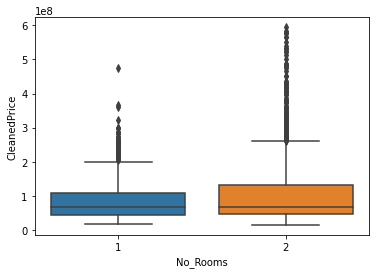

In [21]:
df_12 = df[df["No_Rooms"].isin([1,2])]
sns.boxplot(data=df_12,x="No_Rooms", y="CleanedPrice")

Ho = Tidak terdapat perbedaan rata-rata yang signifikan
H1 = Terdapat perbedaan rata-rata yang signifikan

In [25]:
from scipy import stats
room_1 = df[df["No_Rooms"]==1]['CleanedPrice']
room_2 = df[df["No_Rooms"]==2]['CleanedPrice']

_,p_value= stats.ttest_ind(room_1,room_2,axis=0,equal_var=False)

if p_value <0.05:
    print("Ho ditolak, berbeda secara signifikan secara statistik")
else:
    print("Ho diterima, tidak berbeda signifikan secara statistik")

Ho ditolak, berbeda secara signifikan secara statistik


Analysis:
1. Terdapat 1 darta outliers dengan nilai 800 M yang mengakibatkan hasil visualisasi data menjadi tidak cukup terlihat informatif. Ketika outliers tersebut dihilangkan, dapat dilihat perbandingan jumlah ruangan dengan harga apartemen.
2. Jumlah ruangan secara umum berpengaruh terdapat harga apartemen. Semakin banyak jumlah ruangan semakin mahal harga apartemen

### Nomor 3:

C:\Users\Engineering\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


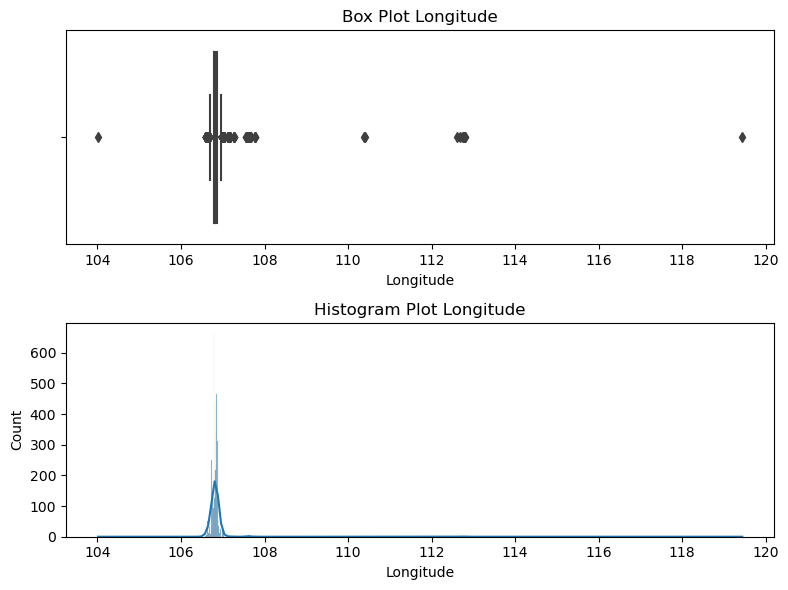

In [26]:
#Analysis Longitude
plt.figure(figsize=(8,6),dpi=100)

plt.subplot(211)
sns.boxplot(df["Longitude"])
plt.title("Box Plot Longitude")

plt.subplot(212)
sns.histplot(df["Longitude"],kde=True,element='bars')
plt.title("Histogram Plot Longitude")

plt.tight_layout()
plt.show()

Dari boxplot terdapat beberapa titik-titik di luar yang menunjukkan kemungkinan adanya outliers. Kita cek nilai titik-titik
tersebut untuk melihat apakah itu outliers atau bukan.

In [27]:
#Pengecekan
df[df["Longitude"]<106].shape

(1, 14)

In [28]:
df[df["Longitude"]>=108].shape

(17, 14)

In [29]:
df[df["Longitude"]>=108]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
54,Puncak Kertajaya Apartment 2BR Non Furnished,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,0,36.0,Tower A,11,IDR,23000000,23000000
246,Sejahtera Family Apartment 2BR Fully Furnished,2,1,Sleman,Jogjakarta,110.393900,-7.773700,1,45.0,Tower A,12,IDR,60000000,60000000
398,Twin Tower (River Peak) Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.748300,-7.251100,1,38.0,Tower A,13,IDR,50400000,50400000
456,Bale Hinggil Apartment Studio Tower A,0,1,Pakuwon City,Surabaya,112.781100,-7.309300,0,20.0,Tower A,9,IDR,20000000,20000000
733,Candiland Apartment 1BR Fully Furnished,1,1,Candisari,Semarang,110.417200,-7.000700,1,28.0,Tower 6,8,IDR,37000000,37000000
803,Soekarno Hatta Malang Apartment Studio Fully F...,0,1,Malang,Malang,112.616900,-7.949100,1,24.0,Tower 1,14,IDR,35000000,35000000
1414,Educity Residence Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Yale,16,IDR,25000000,25000000
1440,Puncak Kertajaya Apartment 2BR Tower B,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,36.0,Tower B,15,IDR,35000000,35000000
1498,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.155050,1,42.0,Tower Ashton,17,IDR,60000000,60000000
1638,Puncak Kertajaya Apartment 1BR Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,22.0,Tower A Selatan,14,IDR,25000000,25000000


In [32]:
#Cek region
df['Region'].value_counts()

Jakarta Selatan    1526
Jakarta Barat      1346
Jakarta Pusat      1082
Jakarta Utara       422
Jakarta Timur       372
Tangerang           322
Bekasi              100
Depok                68
Bandung              33
Surabaya             13
Karawang              5
Sumedang              4
Bogor                 3
Jogjakarta            1
Semarang              1
Malang                1
Makassar              1
Batam                 1
Name: Region, dtype: int64

In [30]:
#Cek region
df['Region'].value_counts()/len(df)*100

Jakarta Selatan    28.787021
Jakarta Barat      25.391436
Jakarta Pusat      20.411243
Jakarta Utara       7.960762
Jakarta Timur       7.017544
Tangerang           6.074326
Bekasi              1.886437
Depok               1.282777
Bandung             0.622524
Surabaya            0.245237
Karawang            0.094322
Sumedang            0.075457
Bogor               0.056593
Jogjakarta          0.018864
Semarang            0.018864
Malang              0.018864
Makassar            0.018864
Batam               0.018864
Name: Region, dtype: float64

In [33]:
for x in df.columns:
    print(f"Unik value dari {x}")
    print(f"{df[x].unique()}")
    print()

Unik value dari Unit_Name
['Taman Sari Semanggi Apartment 1BR Tower A'
 'Puri Park View Apartment 2BR Semi Furnished'
 'Metro Park Residence 2BR Fully Furnished' ...
 'Sudirman Park Apartment 2 BR Fully Furnished'
 'Mediterania Garden Residence 2 3BR Tower Jasmine'
 'Grand Centerpoint Apartment 2BR View pool']

Unik value dari No_Rooms
[1 2 3 0 4 5 6]

Unik value dari Bathroom
[1 2 3 0 4 5]

Unik value dari Locality
['Semanggi' 'Kebon Jeruk' 'Kedoya' 'Pondok Indah' 'Grogol' 'Cempaka Putih'
 'Kemayoran' 'Kemang' 'Pancoran' 'Kelapa Gading' 'Sunter' 'Pondok Bambu'
 'Kuningan' 'Daan Mogot' 'Kebayoran Lama' 'Margonda' 'Tanjung Duren'
 'Thamrin' 'Tebet' 'Cengkareng' 'Cawang' 'Cipinang' 'BSD City'
 'Kebayoran Baru' 'Cakung' 'Puri Indah' 'Menteng' 'Cikokol' 'Kebagusan'
 'Gunung Sahari' 'Dharmawangsa' 'Pakuwon City' 'Sudirman' 'Cilandak'
 'Karang Tengah' 'Gatot Subroto' 'Gajah Mada' 'Ciputat' 'Casablanca'
 'Gandaria' 'Cicendo' 'Pantura' 'Ciumbuleuit' 'MT Haryono' 'Pluit' 'Ancol'
 'Kalibata' 'Ka

Analisis:
1. Longitude merupakan pemetaan daerah dalam bentuk kordinat. Data longitude dapat dikatakan outliers apabila yang tersaji pada data dan bentuk visualisasinya tidak sesuai dengan deskripsi datasetnya.
2. Secara pemetaan yang dapat dilihat diatas. Kebanyakan apartemen berada di daerah jabodetabek. Ada beberapa apartemen yang terdapat di luar kota hingga luar pulau. Namun, secara deskripsi, dataset di atas menyajikan data apartemen high class yang ada di Indonesia. Dan data yang dicurigai outliers berada di kota besar di Indonesia di luar jabodetabek. Maka,dianggap nilai titik-titik yang dicurigai outliers di atas bukanlah merupakan outliers.

### Nomor 4:

C:\Users\Engineering\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


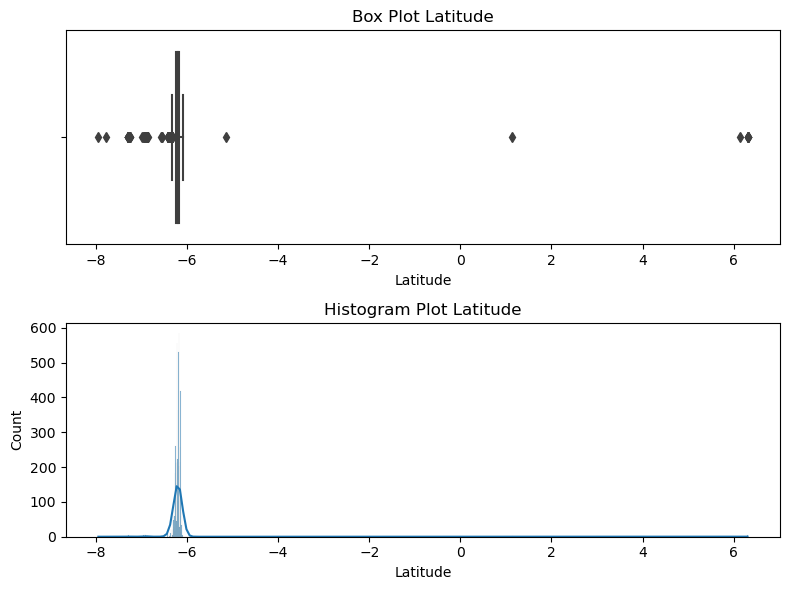

In [34]:
#Analisis Latitude
plt.figure(figsize=(8,6),dpi=100)

plt.subplot(211)
sns.boxplot(df["Latitude"])
plt.title("Box Plot Latitude")

plt.subplot(212)
sns.histplot(df["Latitude"],kde=True,element='bars')
plt.title("Histogram Plot Latitude")

plt.tight_layout()
plt.show()

Analisis:
1. Pada boxplot terdapat titik-titik yang dicurigai sebagai outlier
2. Sama seperti longitude, titik-titik di luar nilai interquartile range di atas tidak dianggap outlier karena definisi dataset yang digunakan merupakan apartemen terkenal yang berada di Indonesia. Dan isi data dari titik-titik outlier di atas merupakan apartemen yang berada di kota besar di luar Jabodetabek

### Nomor 5:

<AxesSubplot:xlabel='CleanedPrice', ylabel='Count'>

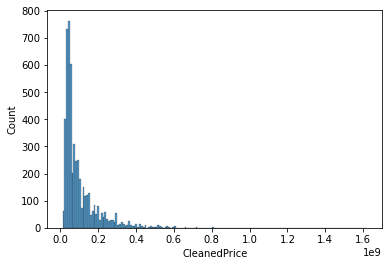

In [35]:
#Check distribution
sns.histplot(df["CleanedPrice"])

Dari plot histogram di atas, terlihat bahwa nilai CleanedPrice tidak terdistribusi normal. Karenanya perlu dilakukan transformasi agar membuat distribusi terlihat normal.

<AxesSubplot:xlabel='CleanedPrice', ylabel='Count'>

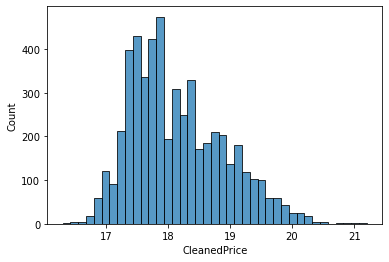

In [36]:
#Log Transformation
sns.histplot(np.log(df["CleanedPrice"]))

Dengan melakukan transformasi menjadi nilai logaritma, maka bentuk distribusi datanya menjadi terlihat lebih mendekati distribusi normal.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<AxesSubplot:>

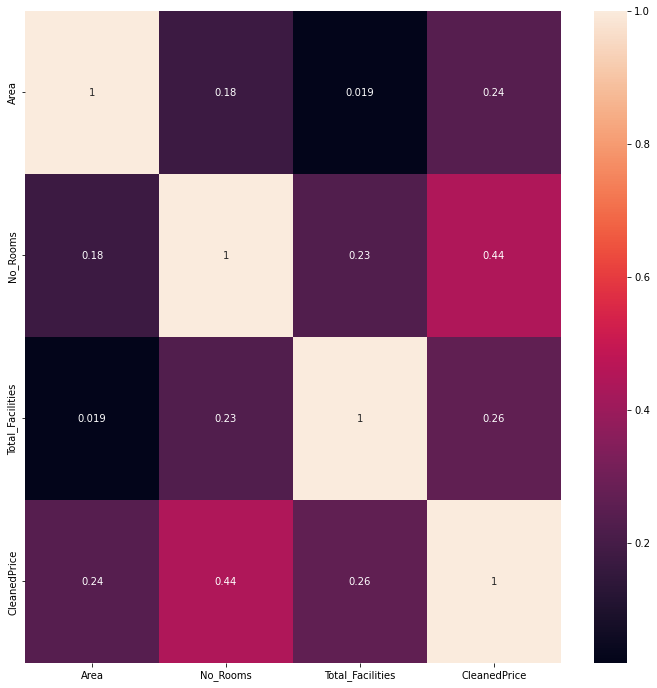

In [37]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df[["Area", "No_Rooms", "Total_Facilities", "CleanedPrice"]].corr(),annot=True,fmt=".2g")

<AxesSubplot:>

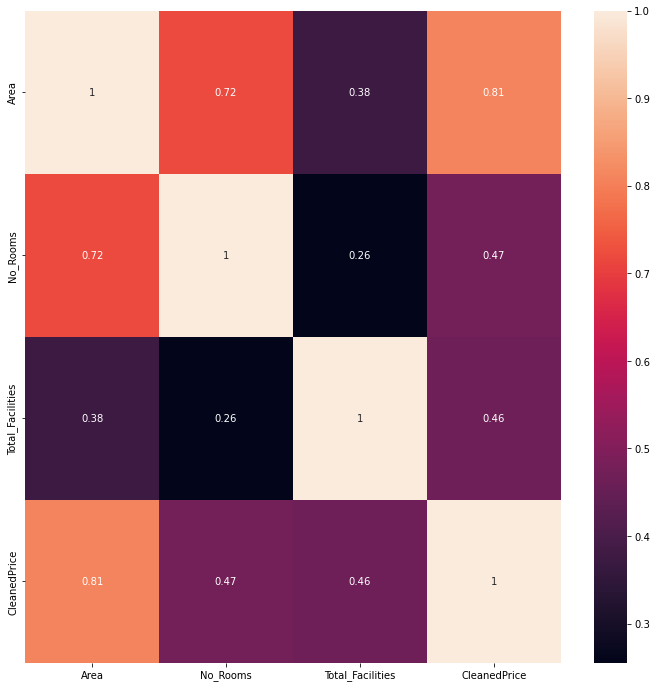

In [38]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df[["Area", "No_Rooms", "Total_Facilities", "CleanedPrice"]].corr(method="spearman"),annot=True,fmt=".2g")

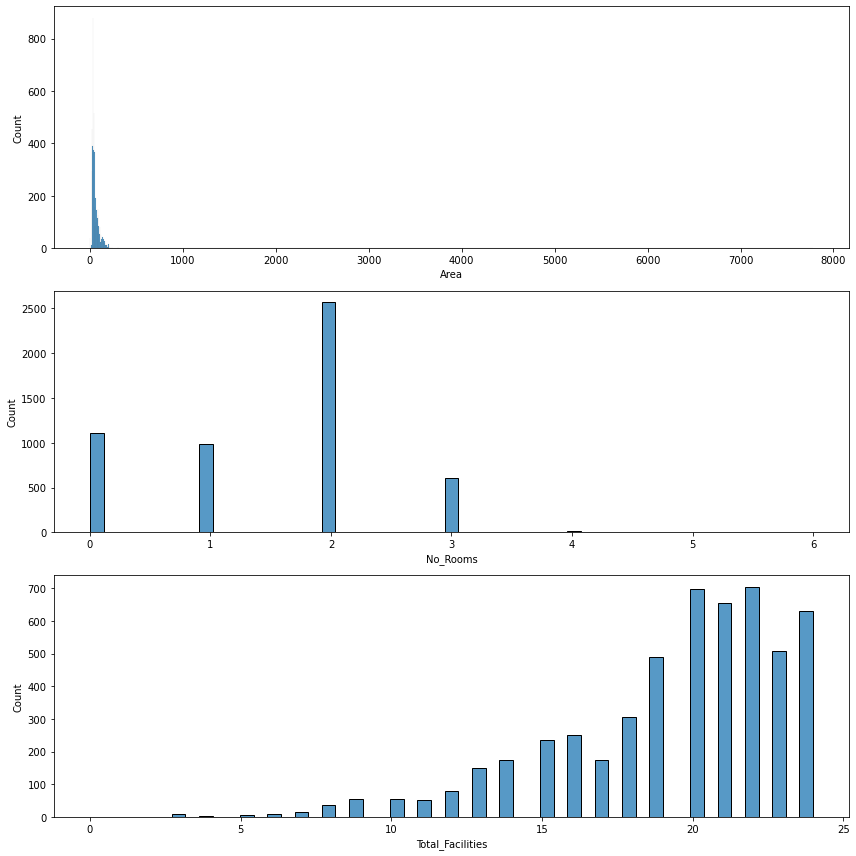

In [40]:
predictors= ["Area","No_Rooms","Total_Facilities"]
plt.figure(figsize=(12,12))
for x in range(0,len(predictors)):
    plt.subplot(3,1,x+1)
    sns.histplot(df[predictors[x]])
    plt.tight_layout()
plt.show()

Pada kolom prediktor terlihat juga bahwa bentuk distribusi tidak normal, maka perlu dilakukan transformasi juga.

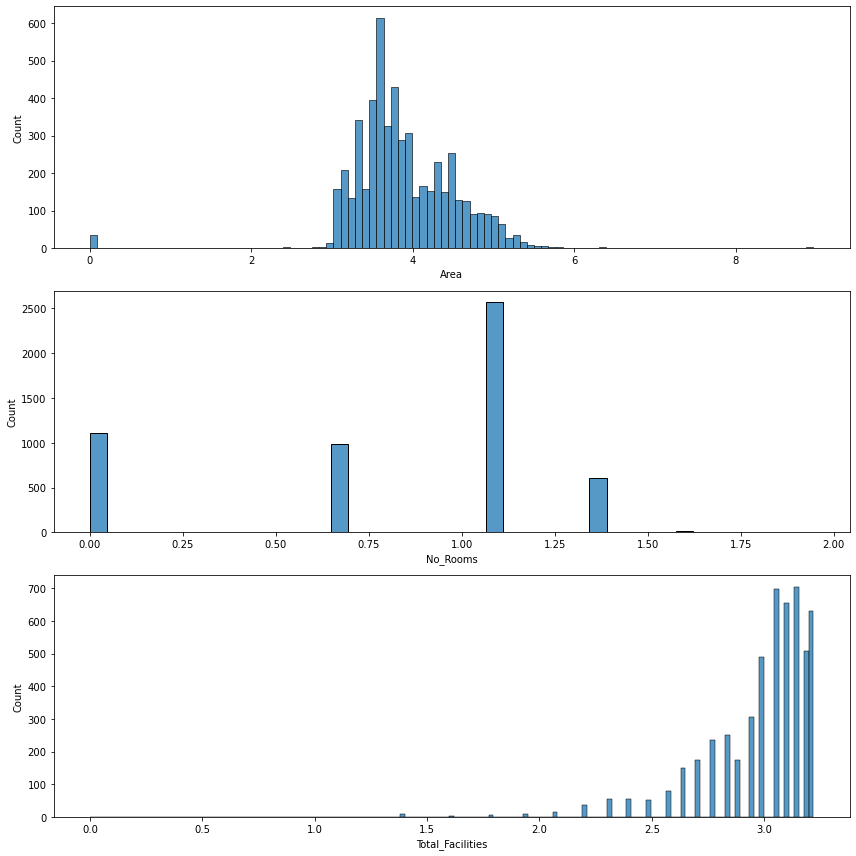

In [41]:
plt.figure(figsize=(12,12))
for x in range(0,len(predictors)):
    plt.subplot(3,1,x+1)
    sns.histplot(np.log(df[predictors[x]]+1))
    plt.tight_layout()
plt.show()

Dengan transformasi menjadi bentuk logaritma, terlihat bahwa kolom area cenderung mengikuti distribusi normal. Namun, kolom No_Rooms dan Total_Facilities tidak memiliki perubahan yang signifikan.

In [42]:
#Transformasi data menggunakan logaritma pada kolom prediktor dan target
X= np.log(df[predictors]+1).copy()
y= np.log(df['CleanedPrice']).copy()

In [45]:
#Splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('Size X train',len(X_train))
print('Size X test',len(X_test))
print('Size y train',len(y_train))
print('Size y test',len(y_test))

Size X train 4240
Size X test 1061
Size y train 4240
Size y test 1061


In [46]:
#Making Model
linear = LinearRegression()

#Learning
linear.fit(X_train,y_train)

LinearRegression()

In [50]:
#Evaluate
pred_train = linear.predict(X_train)

print("R2 Score Train: ",r2_score(y_train,pred_train))
print("Mean Square Error: ", mean_squared_error(y_train,pred_train))
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(y_train,pred_train)))

R2 Score Train:  0.5689706730031742
Mean Square Error:  0.24250500269088945
Root Mean Square Error:  0.49244796952661857


In [49]:
#Evaluate
pred_test = linear.predict(X_test)

print("R2 Score Test: ", r2_score(y_test,pred_test))
print("Mean Square Error: ", mean_squared_error(y_test,pred_test))
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(y_test,pred_test)))

R2 Score Test:  0.5491743211383646
Mean Square Error:  0.2542907036313919
Root Mean Square Error:  0.5042724498040636


Analisis :
1. Nilai R2, MSE dan RMSE tidak memiliki nilai yang berbeda secara signifikan pada score training maupun test, maka tidak terjadi overfitting
2. Model belum menghasilkan hasil yang cukup baik, karena apabila dilihat nilai R2 model hanya dapat menjelaskan data sekitar 50% saja dan error yang dihasilkan masih cukup besar. Hal ini dikarenakan korelasi prediktor dengan target korelasi pearson belum mampu menjelaskan korelasinya. Sedangkan pada spearman korelasinya cukup mampu terjelaskan sehingga prediktor memiliki hubungan yang non-linear dengan target dan masih terdapat outliers pada data yang dimiliki. Diperlukan sebuah model yang dapat bekerja dengan variabel non-linear dan juga robust dengan outlier seperti decision tree, RF, dan lain-lain